In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [37]:
df = pd.read_csv('Admission_Predict.csv')

In [38]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [40]:
df.shape

(400, 9)

In [41]:
df.drop(columns=['Serial No.'],inplace=True)

In [42]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [43]:
scaler = StandardScaler()

In [44]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [45]:
x = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit '].values

In [46]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [47]:
x_new = scaler.fit_transform(x)

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x_new,y,test_size=0.2)

In [49]:
# x_train_sc = scaler.fit_transform(x_train)
# x_test_sc = scaler.transform(x_test)

In [51]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
# model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))



In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [55]:
history = model.fit(x_train,y_train,epochs=1000,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.5704 - val_accuracy: 0.0000e+00 - val_loss: 0.3632
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4140 - val_accuracy: 0.0000e+00 - val_loss: 0.2841
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2661 - val_accuracy: 0.0000e+00 - val_loss: 0.2301
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2029 - val_accuracy: 0.0000e+00 - val_loss: 0.1913
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1678 - val_accuracy: 0.0000e+00 - val_loss: 0.1637
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1416 - val_accuracy: 0.0000e+00 - val_loss: 0.1444
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1411 - val_accuracy: 0.0000e+00 - val_loss: 0.1303
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [56]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [64]:
x_train[1]

array([0.62765641, 0.42725722, 0.79882862, 1.09386422, 0.61012728,
       0.92528814, 0.90911166])

In [57]:

r2_score(y_test,y_pred)

0.6989416196664853

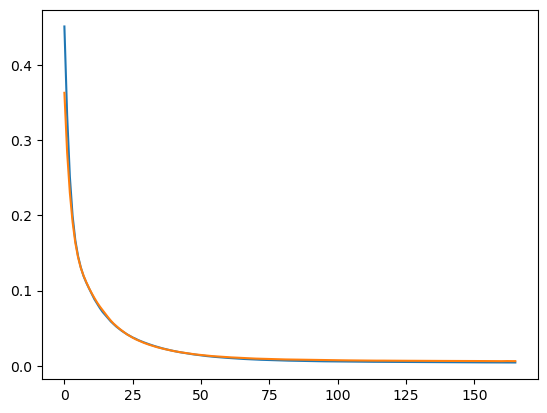

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

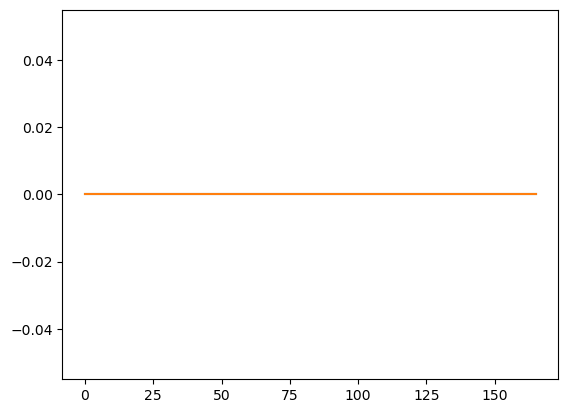

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [1]:



# Fit the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')


Epoch 1/1000


/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1111 - mae: 0.9700 - val_loss: 1.0929 - val_mae: 0.9572
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9160 - mae: 0.8717 - val_loss: 0.8850 - val_mae: 0.8496
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6860 - mae: 0.7473 - val_loss: 0.7139 - val_mae: 0.7519
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5905 - mae: 0.6944 - val_loss: 0.5752 - val_mae: 0.6622
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4602 - mae: 0.5996 - val_loss: 0.4691 - val_mae: 0.5967
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3731 - mae: 0.5341 - val_loss: 0.3981 - val_mae: 0.5408
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2882 - mae: 0.4600 - val_loss: 0.3481 - val_mae: 0.4907
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2492 - mae: 0.4193 - val_loss: 0.3121 - val_mae: 0.4538
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2280 - mae: 0.3826 - val

In [4]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [5]:
r2_score(y_pred,y_test)

0.7453220028904801

In [6]:
import numpy as np

# Assuming 'ar' is your input array
ar = np.array([0.62765641, 0.42725722, 0.79882862, 1.09386422, 0.61012728,
                0.92528814, 0.90911166])

# Reshape 'ar' to be a 2D array with shape (1, n_features)
ar_reshaped = ar.reshape(1, -1)  # '-1' means to automatically determine the number of columns

# Now you can use the model to predict
y_tp = model.predict(ar_reshaped)
print(y_tp)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.82657427]]


In [10]:
x_train.shape[1]

7